# Contents


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
#train_y = train_df.y
#train_x = train_df.drop(['y'],axis = 1)
test_df = pd.read_csv('test.csv')
print 'Traing set shape: ',train_df.shape
print 'Test set shape:', test_df.shape
catcols = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]

Traing set shape:  (4209, 378)
Test set shape: (4209, 377)


In [7]:
train_df['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [10]:
train_df[['y','ID']].corr()

,y,ID
y,1.000000,-0.055108
ID,-0.055108,1.000000


In [17]:
from statsmodels.stats import anova

In [19]:
anova.anova_lm?

# Exploratory of training set

In [4]:
train_df.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.describe(include= [np.object])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [6]:
train_df.describe(include=['O'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


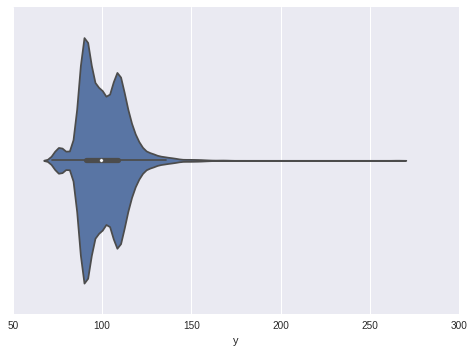

In [7]:
sns.violinplot(train_df.y)

1


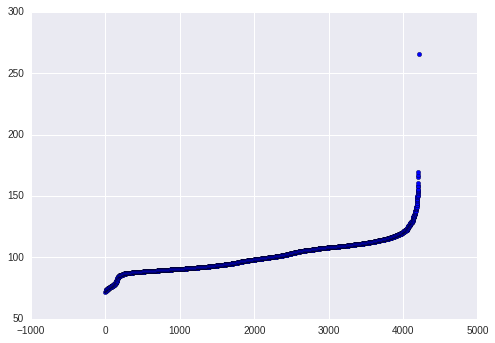

In [8]:
print (train_df.y>200).sum()
plt.scatter(range(train_df.shape[0]),train_df.y.sort_values().values)

In [9]:
train_df.y.sort_values(ascending=0)[:5]

883     265.32
342     169.91
1459    167.45
3133    165.52
1203    160.87
Name: y, dtype: float64

In [10]:
df_dtype = train_df.dtypes.reset_index()
df_dtype.columns = ['name', 'type']
df_dtype.groupby('type').count()

,name
type,
int64,369
float64,1
object,8


In [11]:
col = list()
for i in range(378):
    if len(train_df.iloc[:,i].unique()) == 1:
        col.append( train_df.columns[i])

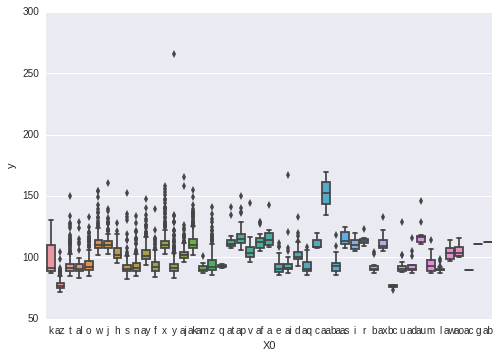

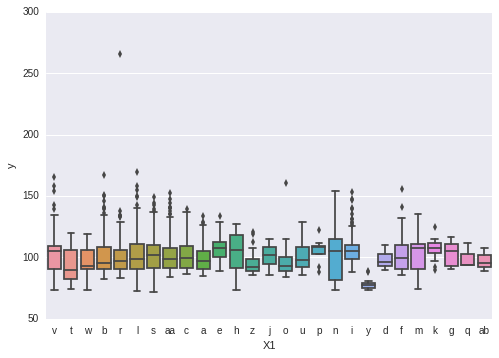

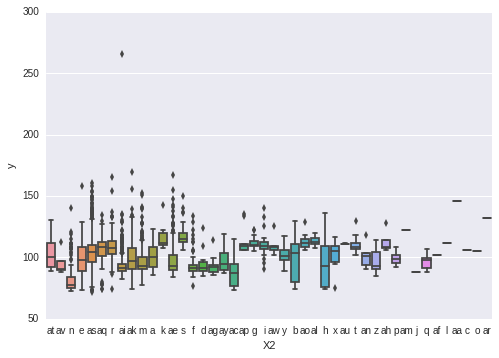

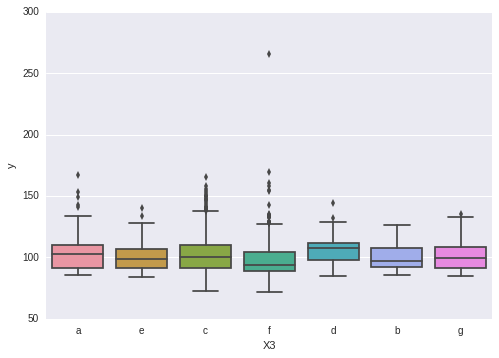

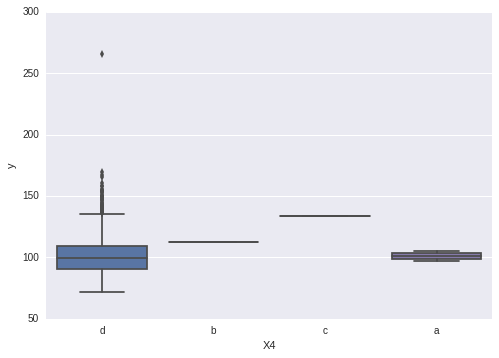

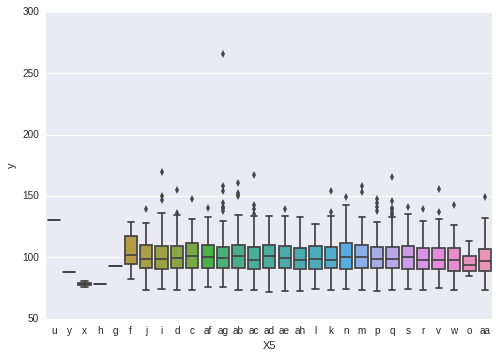

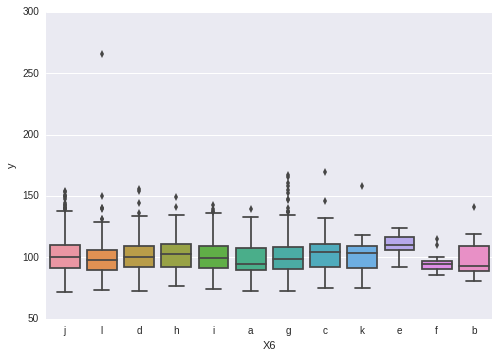

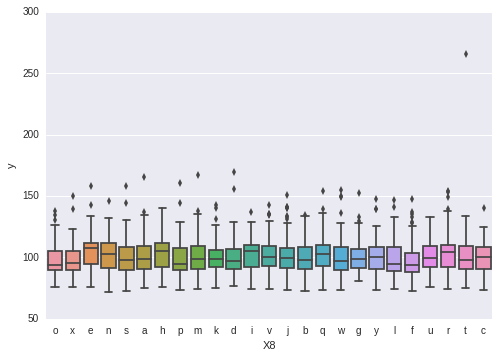

In [12]:
for i in range(2,10):
    #rank = train_df.iloc[:,i].unique()
    sns.boxplot(train_df.iloc[:,i], train_df.y)
    plt.show()

In [13]:
#rank = train_df.groupby("X0")["y"].mean().sort_values().index
plt.figure(figsize=(20,5))
sns.boxplot(train_df.iloc[:,2], train_df.y, order=rank)

NameError: name 'rank' is not defined

# Compare training set and test set

## Compare ID to find the split rules

In [ ]:
plt.hist(train_df.ID.values)

In [ ]:
plt.hist(test_df.ID.values)

# Feature engineering
## Categorical value of train and test are different
I try to change the catogorical data in test set to values existant in training set.

In [ ]:
for i in range(2,10):
    print train_df.columns[i], set(test_df.iloc[:,i-1].unique()).difference(set(train_df.iloc[:,i].unique()))

In [ ]:
print sorted(test_df.iloc[:,4-1].unique())
print sorted(train_df.iloc[:,4].unique())

In [ ]:
x0_tran = {'ae':'ad', 'ag':'af','bb':'ba','an':'am','p':'r','av':'aw'}
x2_tran = {'ab':'ac', 'ad':'ae', 'aj':'ai', 'u':'t', 'w':'x', 'ax':'ay'}
x4_tran = {'a':'aa', 'b':'c', 't':'r', 'z':'y'}



In [ ]:
test_df.iloc[:,1] = map(lambda x: x0_tran[x] if x in x0_tran.keys() else x, test_df.iloc[:,1])
test_df.iloc[:,3] = map(lambda x: x2_tran[x] if x in x2_tran.keys() else x, test_df.iloc[:,3])
test_df.iloc[:,6] = map(lambda x: x4_tran[x] if x in x4_tran.keys() else x, test_df.iloc[:,6])

In [ ]:
names = []
num = []
for i in range(2,10):
    names.append(train_df.columns[i])
    num.append(len(train_df.iloc[:,i].unique()))
cat_pd = pd.DataFrame({"names" : names, "num" : num})
print "Dimension if use OneHot:", cat_pd.num.sum()
print 'Total dimension:', cat_pd.num.sum() + train_df.shape[1] - 8

In [ ]:
for i in range(2,10):
    print train_df.columns[i], set(test_df.iloc[:,i-1].unique()).difference(set(train_df.iloc[:,i].unique()))

## Encode the categorical data

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# fit the Label binarizer
lbs = list()
for col in train_df.select_dtypes(['object']).columns:
    lb = LabelBinarizer().fit(train_df[col])
    lbs.append(lb)

In [ ]:
# transform the trianing set
for lb in lbs:
    bina_df = pd.DataFrame(lb.transform(train_df[col]),
                           columns= map(lambda x: col + '_' + str(x), range(len(lb.classes_))))
    train_df = pd.concat([train_df, bina_df], axis=1)
# transform the test set    
for col,lb in zip(test_df.select_dtypes(['object']).columns, lbs):
    bina_df = pd.DataFrame(lb.transform(test_df[col]),
                           columns= map(lambda x: col + '_' + str(x), range(len(lb.classes_))))
    test_df = pd.concat([test_df, bina_df], axis=1)

## Drop the features whose values are unique in training set.

In [ ]:
cols_drop = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268',
            'X289','X290','X293','X297','X330','X347']
train_df = train_df.drop(cols_drop, axis = 1)
test_df = test_df.drop(cols_drop, axis = 1)

# Regression
## try box-cox transform

In [ ]:
from scipy.special import inv_boxcox
from scipy.stats import boxcox
#y_new, _lambda = boxcox(train_y)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

lr = LassoCV(cv=5)
lr.fit(train_df.iloc[:,10:], train_df.y)
r2_score(train_df.y, lr.predict(train_df.iloc[:,10:]))

In [ ]:
lr.predict(test_df.iloc[:,9:])
#test_y_box = lr.predict(test_df.iloc[:,9:])
test_df['y'] = lr.predict(test_df.iloc[:,9:])
test_df.to_csv('res_rigid.csv',columns =['ID','y'], index =False)

In [ ]:
spy_x = pd.read_csv('train-x.csv')

In [21]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [26]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from statsmodels.formula.api import ols
model = ols("y ~ X0 + X1 + X2 + X3", train_df).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     47.72
Date:                Fri, 09 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:21:18   Log-Likelihood:                -14820.
No. Observations:                4209   AIC:                         2.988e+04
Df Residuals:                    4088   BIC:                         3.065e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    115.7298      4.848     23.873      0.000       106.226   125.234
X0[T.aa]      35.5419      7.528      4.721      0.000        20.782    50.302
X0[T.ab]      10.3496      9.944      1.041      0.298        -9.147    29.846
X0[T.ac]     -10.6837      9.900     -1.079      0.281       -30.092     8.725
X0[T.ad]     -22.7332      5.181     -4.387      0.000       -32.892   -12.575
X0[T.af]      -2.6687      4.903     -0.544      0.586       -12.282     6.944
X0[T.ai]     -20.8504      4.847     -4.302      0.000       -30.353   -11.348
X0[T.aj]     -12.1106      4.714     -2.569      0.010       -21.353    -2.869
X0[T.ak]      -3.4967      4.688     -0.746      0.456       -12.688     5.694
X0[T.al]     -23.3290      4.766     -4.894      0.000       -32.674   -13.984
X0[T.am]     -25.5264      5.037     -5.068      0.000       -35.402   -15.651
X0[T.ao]     -10.6098      6.283     -1.689      0.091       -22.927     1.707
X0[T.ap]       5.4116      5.064      1.069      0.285        -4.516    15.339
X0[T.aq]     -21.8354      5.076     -4.302      0.000       -31.787   -11.884
X0[T.as]       1.0696      5.462      0.196      0.845        -9.639    11.778
X0[T.at]      -2.1994      4.924     -0.447      0.655       -11.853     7.454
X0[T.au]       0.2101      5.339      0.039      0.969       -10.257    10.677
X0[T.aw]     -12.6764      5.116     -2.478      0.013       -22.706    -2.647
X0[T.ax]      -4.4380      5.045     -0.880      0.379       -14.328     5.452
X0[T.ay]     -13.1049      4.636     -2.827      0.005       -22.194    -4.015
X0[T.az]     -38.2033      4.787     -7.981      0.000       -47.588   -28.819
X0[T.b]      -23.9653      5.268     -4.550      0.000       -34.293   -13.638
X0[T.ba]     -22.0106      4.899     -4.493      0.000       -31.615   -12.406
X0[T.bc]     -29.7838      5.343     -5.574      0.000       -40.259   -19.308
X0[T.c]       -5.3465      6.790     -0.787      0.431       -18.658     7.965
X0[T.d]      -13.8276      4.725     -2.927      0.003       -23.090    -4.565
X0[T.e]      -23.0145      4.894     -4.702      0.000       -32.610   -13.419
X0[T.f]      -22.2956      4.705     -4.738      0.000       -31.520   -13.071
X0[T.g]        4.9453     10.426      0.474      0.635       -15.495    25.386
X0[T.h]      -12.4564      4.733     -2.632      0.009       -21.736    -3.177
X0[T.i]       -5.6864      5.073     -1.121      0.262       -15.632     4.259
X0[T.j]       -4.2282      4.551     -0.929      0.353       -13.151     4.694
X0[T.k]      -10.9851      4.810     -2.284      0.022       -20.414    -1.556
X0[T.l]      -25.1404      5.114     -4.916      0.000       -35.166   -15.115
X0[T.m]      -21.2200      4.886     -4.343      0.000       -30.799   -11.641
X0[T.n]      -22.9011      4.700     -4.873      0.000       -32.116   -13.687
X0

In [32]:
import statsmodels

In [33]:
statsmodels?